In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, make_scorer, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

from pyoperon.sklearn import SymbolicRegressor
from pyoperon import R2, MSE, InfixFormatter, FitLeastSquares, Interpreter

from pmlb import regression_dataset_names, fetch_data

print(regression_dataset_names)

['1027_ESL', '1028_SWD', '1029_LEV', '1030_ERA', '1089_USCrime', '1096_FacultySalaries', '1191_BNG_pbc', '1193_BNG_lowbwt', '1196_BNG_pharynx', '1199_BNG_echoMonths', '1201_BNG_breastTumor', '1203_BNG_pwLinear', '1595_poker', '192_vineyard', '195_auto_price', '197_cpu_act', '201_pol', '207_autoPrice', '210_cloud', '215_2dplanes', '218_house_8L', '225_puma8NH', '227_cpu_small', '228_elusage', '229_pwLinear', '230_machine_cpu', '294_satellite_image', '344_mv', '4544_GeographicalOriginalofMusic', '485_analcatdata_vehicle', '503_wind', '505_tecator', '519_vinnie', '522_pm10', '523_analcatdata_neavote', '527_analcatdata_election2000', '529_pollen', '537_houses', '542_pollution', '547_no2', '556_analcatdata_apnea2', '557_analcatdata_apnea1', '560_bodyfat', '561_cpu', '562_cpu_small', '564_fried', '573_cpu_act', '574_house_16H', '579_fri_c0_250_5', '581_fri_c3_500_25', '582_fri_c1_500_25', '583_fri_c1_1000_50', '584_fri_c4_500_25', '586_fri_c3_1000_25', '588_fri_c4_1000_100', '589_fri_c2_1000

In [2]:
X, y = fetch_data('1027_ESL', return_X_y=True, local_cache_dir='./datasets')

In [3]:
reps = 1

values = []
for _ in range(reps):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, shuffle=True)

    reg = SymbolicRegressor(
        allowed_symbols='add,sub,mul,aq,sin,constant,variable',
        offspring_generator='basic',
        optimizer_iterations=10,
        max_length=50,
        initialization_method='btc',
        n_threads=8,
        objectives = ['r2', 'length'],
        epsilon = 0,
        random_state=None,
        reinserter='keep-best',
        max_evaluations=int(1e6),
        symbolic_mode=False,
        tournament_size=3
    )

    reg.fit(X_train, y_train)
    values += [t['objective_values'] for t in reg.pareto_front_]


/nix/store/r8i5s1pmxw5l0mg9rsci53qm8sdjf67i-python3-3.11.7-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/nix/store/r8i5s1pmxw5l0mg9rsci53qm8sdjf67i-python3-3.11.7-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Obj 1 (Tree length)', ylabel='Obj 2 (-R2)'>

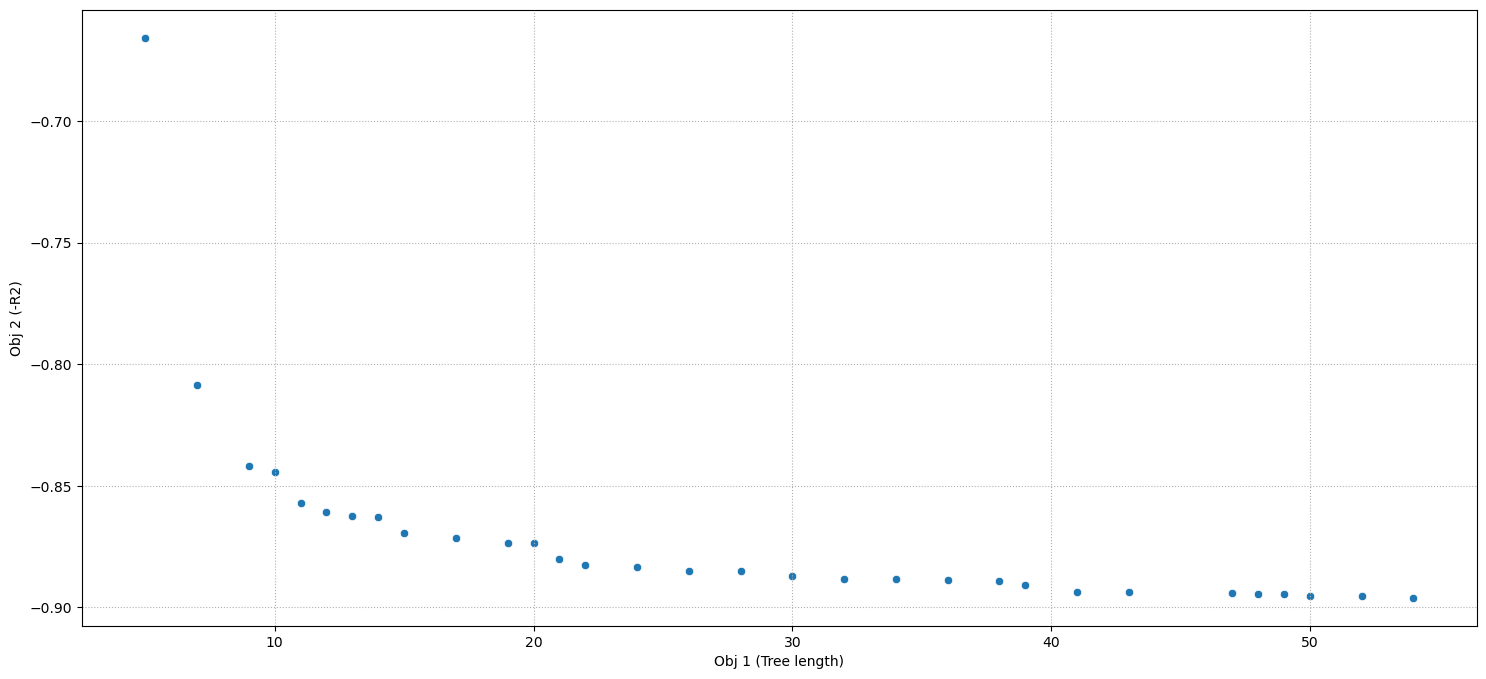

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

values = np.array(values)
fig, ax = plt.subplots(figsize=(18,8))
ax.grid(True, linestyle='dotted')
ax.set(xlabel='Obj 1 (Tree length)', ylabel='Obj 2 (-R2)')
sns.scatterplot(ax=ax, x=values[:,1], y=values[:,0])